# **El Perceptrón**

In [7]:
#PlayGROUND OF NEURAL NETWORKS
#https://playground.tensorflow.org/

https://spin.atomicobject.com/2014/06/24/gradient-descent-linear-regression/

¿Cómo ocurre la propagacion inversa por medio del gradiente descendiente? Revisar el link

Sugerencia: primero leer y entender la parte de la definición general (if __name__ == "__main__":) y despues entrar en el modelo del perceprtron (class NeuralNetwork())

Abdel - 2022

In [8]:
#Librerías
from numpy import exp, array, random, dot

###Definición del Perceptrón

In [9]:
#Perceptrón
class NeuralNetwork():
    def __init__(self):
        # Inicializar la semilla del generador aleatorio para que siempre de los mismos numeros
        # cada vez que el programa corra
        random.seed(1)

        # Modelo de una sola neurona, con una conexion de salida y tres de entrada.
        # asignamos pesos aleatorios a una matriz 3 x 1, con los valores en el rango -1 a 1
        # y media 0.
        self.synaptic_weights = 2 * random.random((3, 1)) - 1

        self.E = [] #Errors per iteration

    # La función sigmoidea, que describe una función en forma de s, es la función de activación.
    # Nosotros hacemos pasar la suma de los pesos a través de dicha función para normalizarla entre 0 y 1 (porque eso es lo que esperamos) y así poder dar un resultado
    def __tanh(self, x):
        return (exp(x) - exp(-x)) / (exp(x) + exp(-x))

    # La derivada de la función sigmoidea
    # es el gradiente descendiente de la función sigmoidea
    # Indica qué tanto "le creemos" a los pesos resultantes, revisar link.
    def __tanh_derivative(self, x):
        return 1 - (x**2)

    # Entrenamos a la red neuronal a través de un proceso de prueba y error
    # Ajustamos los pesos sinápticos en cada iteración
    def train(self, training_set_inputs, training_set_outputs, number_of_training_iterations, learning_rate):
        for iteration in range(number_of_training_iterations):
            # Pasamos el conjunto de entrenamiento a través de la red neuronal (una única neurona).
            output = self.think(training_set_inputs)

            # Calculamos el error (La diferencia entre el valor que esperamos obtener realmente
            # y la salida predicha).
            error = training_set_outputs - output

            #Promediando los errores
            f = 0
            for i in range(len(error)):
              f = f + float(error[i])

            f = f/len(error)
            self.E.append(f) #Añade los errores a la lista


            #Multiplicamos el error por el learning rate
            error = error*learning_rate

            # Multiplique el error por la entrada y de nuevo por el gradiente descendiente de la función sigmoidea.
            # Esto significa que los pesos menos confiables se ajustan más (filtrado) 
            # Esto significa que las entradas, que son cero, no causan cambio a los pesos.
            #--------------------------
            adjustment = dot(training_set_inputs.T, error * self.__tanh_derivative(output))

            # Ajustar los pesos.
            self.synaptic_weights += adjustment

    #Proceso de aprendizaje de la red neuronal:
    def think(self, inputs):
        # Pasamos las entradas a través de la red neuronal (una única neurona).
        return self.__tanh(dot(inputs, self.synaptic_weights))

###Clase Principal

In [10]:
#Clase principal
if __name__ == "__main__":

    #Inicialice una red neuronal de una sola neurona. Quizas no sea propiamente una red... 
    neural_network = NeuralNetwork()

    print ("Pesos sinapticos iniciales generados aleatoriamente: ")
    print (neural_network.synaptic_weights)

    # El conjunto de entrenamiento. Tenemos 4 ejemplos, cada uno consistente de tres valores de entrada con su respectiva salida (una salida)
    training_set_inputs = array([[0, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1],[0, 0, 0], [0, 1, 0],[1, 1, 0]])
    training_set_outputs = array([[0, 1, 0, 0, 0, 0, 0]]).T
  
    #Number of epoch or Ciclys of learning
    epoch = int(input('Number of Cycle: '))
    learning_rate = float(input('learning rate: '))


    # Entrene a la red neuronal usando un conjunto de entrenamiento.
    # lo iteramos 10,000 veces, haciendo pequeños ajustes de pesos en cada iteración
    neural_network.train(training_set_inputs, training_set_outputs, epoch, learning_rate)

    print ("Nuevos pesos sinapticos después del entremaniento: ")
    print (neural_network.synaptic_weights)

    # Pruebe la red neuronal con una situacion desconocida.
    test = array([1, 0, 1])
    print ("Considerando las entradas: ")
    print (test)
    print ("---------------------------")
    print (neural_network.think(test))         #100000 iterations - 0.25 learning rate

    #NORMALIZATION
    x = float(neural_network.think(test))
    if x > 0.3:                                #The Hyperbolic tangent it's between -1 and 1
      x = 1
    else:
      x = 0
    print("---------------------------")
    print('The result is: ', x)

    print("---------------------------")


Pesos sinapticos iniciales generados aleatoriamente: 
[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]
Number of Cycle: 10000
learning rate: 0.1
Nuevos pesos sinapticos después del entremaniento: 
[[0.2098857 ]
 [0.09248174]
 [0.09248174]]
Considerando las entradas: 
[1 0 1]
---------------------------
[0.29347765]
---------------------------
The result is:  0
---------------------------


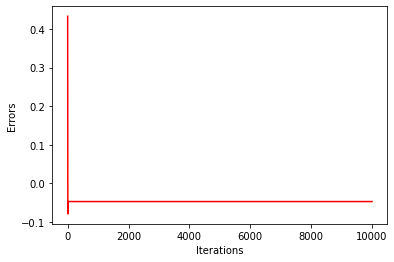

In [11]:
import matplotlib.pyplot as plt

plt.plot(neural_network.E, color="red")     #Columnas a graficar y el color
plt.ylabel("Errors")                              #Nombre de los datos en Y
plt.xlabel("Iterations")                         #Nombre de los datos en X
plt.show()                                    #Imprime la grafica
